In [1]:
#importing respective libraries and setting up the enviornment

'''data working libraries'''
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

'''data visualisation libraries'''
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
py.offline.init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
#loading the data
iris = load_iris()

In [3]:
#setting up our x and y variables correspondingly
x=iris.data
y=iris.target

In [4]:
#concatinating the x and y np arrays into a single np array so that can be 
#converted to a dataframe later on
data=np.c_[x,y]

In [5]:
#making a header list for corresponding column indices in DF
cols=['sepal_length','sepal_width','petal_length','petal_width']
header=cols+['species']
#converting into a dataframe for visualisation purposes
iris_df=pd.DataFrame(data=data,columns=header)

In [6]:
iris_df.head()
#upadating values 0,1,2 in species column with real names
iris_df.species.replace(0.0,'iris-sesota',inplace=True)
iris_df.species.replace(1.0,'iris-versicolor',inplace=True)
iris_df.species.replace(2.0,'iris-virginica',inplace=True)

# Analysing The Data

In [7]:
'''our dataset has 150 datapoints(entries) and 4 featues'''
iris_df.shape

(150, 5)

In [8]:
'''Some visualisations to understand the data better'''

'Some visualisations to understand the data better'

#  Relation Between Sepal Length And Sepal Width

In [9]:
#import graph_obj as go
import plotly.graph_objs as go

#split the datasets according to the respective species so that
#easier while plotting scatter plots
df1=iris_df.iloc[:50,:]
df2=iris_df.iloc[50:100,:]
df3=iris_df.iloc[100:150,:]
#creating traces
trace1 = go.Scatter(
    #x=x-axis
    x=df1.sepal_length,
    #y=y-axis
    y=df1.sepal_width,
    #mode defines the type of plot eg-lines,markers,line+markers
    mode='markers',
    #name pf the plots
    name='iris-setosa',
    #markers->color and alpha of the respective trace
    marker=dict(color = 'rgba(255, 128, 2, 0.8)'),
    #the hover text
    text=df1.species)
trace2 = go.Scatter(
    x=df2.sepal_length,
    y=df2.sepal_width,
    mode='markers',
    name='iris-versicolor',
    marker=dict(color = 'rgba(0, 255, 200, 0.8)'),
    text=df2.species)
trace3 = go.Scatter(
    x=df3.sepal_length,
    y=df3.sepal_width,
    mode='markers',
    name='iris-virginica',
    marker=dict(color = 'rgba(255, 128, 255, 0.8)'),
    text=df3.species)
#a list of all the traces
data_list=[trace1,trace2,trace3]
#it is a dictionary containing info about title,axis etc
layout=dict(title='Sepal length and Sepal Width of Species',
               xaxis=dict(title='Sepal Length',ticklen=5,zeroline=False),
               yaxis=dict(title='Sepal Width',ticklen=5,zeroline=False)
            )
#fig object includes data and layout
fig=dict(data=data_list,layout=layout)
#plotting the fig
py.offline.iplot(fig)

# Relation Between Petal Length And Petal Width

In [10]:
#import graph_obj as go
import plotly.graph_objs as go

#split the datasets according to the respective species so that
#easier while plotting scatter plots
df1=iris_df.iloc[:50,:]
df2=iris_df.iloc[50:100,:]
df3=iris_df.iloc[100:150,:]
#creating traces
trace1 = go.Scatter(
    #x=x-axis
    x=df1.petal_length,
    #y=y-axis
    y=df1.petal_width,
    #mode defines the type of plot eg-lines,markers,line+markers
    mode='markers',
    #name pf the plots
    name='iris-setosa',
    #markers->color and alpha of the respective trace
    marker=dict(color = 'rgba(255, 128, 2, 0.8)'),
    #the hover text
    text=df1.species)
trace2 = go.Scatter(
    x=df2.petal_length,
    y=df2.petal_width,
    mode='markers',
    name='iris-versicolor',
    marker=dict(color = 'rgba(0, 255, 200, 0.8)'),
    text=df2.species)
trace3 = go.Scatter(
    x=df3.petal_length,
    y=df3.petal_width,
    mode='markers',
    name='iris-virginica',
    marker=dict(color = 'rgba(255, 128, 255, 0.8)'),
    text=df3.species)
#a list of all the traces
data_list=[trace1,trace2,trace3]
#it is a dictionary containing info about title,axis etc
layout=dict(title='Petal length and Petal Width of Species',
               xaxis=dict(title='Petal Length',ticklen=5,zeroline=False),
               yaxis=dict(title='Petal Width',ticklen=5,zeroline=False)
            )
#fig object includes data and layout
fig=dict(data=data_list,layout=layout)
#plotting the fig
py.offline.iplot(fig)

In [11]:
'''the above scatter matrix clearly show that petal length is a better
feature to split initally than sepal length or sepal widht as petal length/width are
much distinct among the respective classes'''

'the above scatter matrix clearly show that petal length is a better\nfeature to split initally than sepal length or sepal widht as petal length/width are\nmuch distinct among the respective classes'

# Correlation among features

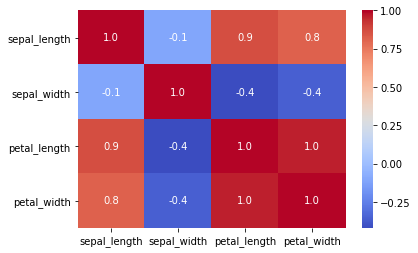

In [12]:
#the correlation matrix heatmap for analysing the correlation among features
corr_martix=iris_df[cols].corr()
sns.heatmap(corr_martix,cbar=True,annot=True,fmt='.1f',cmap='coolwarm');
#we can see petal length and petal width ad correlated very highly and same can be said for sepal lenght and sepal width

#  Writing and Visualising Our Own Decision Tress

The basic idea of decision trees is choosing particular values of 
particular features to split the data best(gain-ratio) and by this 
repeated process of splitting we keep refining the data until all we 
have got is simmilar type of labels in the branch or there are no features 
left to split upon .
So the basic idea rests upon asking the right questions.

In [13]:
'''So we will start upon with making a questions class which upon
given proper params. will frame the question for us(which will help us while printing the tree too)'''


'So we will start upon with making a questions class which upon\ngiven proper params. will frame the question for us(which will help us while printing the tree too)'

In [14]:
class Question:
    #initialise column and value variables->
    #eg->if ques is ->is sepal_length>=1cm then
    #sepal_length==col and 1cm=value
    def __init__(self,column,value):
        self.column=column
        self.value=value
    #it matches wheter the given data is in accordace with the value set or not
    #returns true and false accordingly
    def match(self,data):
        value=data[self.column]
        return value>=self.value
    # This is just a helper method to print
    # the question in a readable format.
    def __repr__(self):
        condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

In [15]:
'demo of question class'
#forming a question
Question(0,5)
## it takes column as 0 and value as 5 
q=Question(0,5)
#now it checks wheter the values on 0th column of the 4th datapoint is >= 5 or not
#and returns true or false accordingly
q.match(x[3])

False

In [16]:
#count the unique values of labels and store them in a dictionary
def count_values(rows):
    #will return a dictionary with species values as key and frequency as values
    count={}
    #takes whole dataset in as argument
    for row in  rows:
        #traverse on each datapoint
        label=row[-1]
        #labels are in the last column
        #if label is not even once come initialise it
        if label not in count:
            count[label]=0
        #increase the count of present label by 1
        count[label]+=1
    return count 

In [17]:
'''demo count function'''
count_values(data)
#hinglish comment
#haar row main jayega -> last element ko label se initialise karega->

{0.0: 50, 1.0: 50, 2.0: 50}

In [18]:
#spliting the data based on the respective ques.
def partition(rows,question):
    #intialise two seprate lists 
    true_row,false_row=[],[]
    for row in rows:
        #traverse on each datapoint
        #match the given datapoint with the respective question
        if question.match(row):
            #if question.match returns true aka value is satisfied
            #append the given row in true row list
            true_row.append(row)
        else:
            false_row.append(row)
    return true_row,false_row

In [19]:
#demo of partition function
#our question is ->
print(Question(0,5))
#t_r represents true_rows and f_r false_rows
t_r,f_r=partition(data,Question(0,5))
#thus t_r will only contain sepal legnth values > 5cm
t_r

Is sepal_length >= 5?


[array([5.1, 3.5, 1.4, 0.2, 0. ]),
 array([5. , 3.6, 1.4, 0.2, 0. ]),
 array([5.4, 3.9, 1.7, 0.4, 0. ]),
 array([5. , 3.4, 1.5, 0.2, 0. ]),
 array([5.4, 3.7, 1.5, 0.2, 0. ]),
 array([5.8, 4. , 1.2, 0.2, 0. ]),
 array([5.7, 4.4, 1.5, 0.4, 0. ]),
 array([5.4, 3.9, 1.3, 0.4, 0. ]),
 array([5.1, 3.5, 1.4, 0.3, 0. ]),
 array([5.7, 3.8, 1.7, 0.3, 0. ]),
 array([5.1, 3.8, 1.5, 0.3, 0. ]),
 array([5.4, 3.4, 1.7, 0.2, 0. ]),
 array([5.1, 3.7, 1.5, 0.4, 0. ]),
 array([5.1, 3.3, 1.7, 0.5, 0. ]),
 array([5. , 3. , 1.6, 0.2, 0. ]),
 array([5. , 3.4, 1.6, 0.4, 0. ]),
 array([5.2, 3.5, 1.5, 0.2, 0. ]),
 array([5.2, 3.4, 1.4, 0.2, 0. ]),
 array([5.4, 3.4, 1.5, 0.4, 0. ]),
 array([5.2, 4.1, 1.5, 0.1, 0. ]),
 array([5.5, 4.2, 1.4, 0.2, 0. ]),
 array([5. , 3.2, 1.2, 0.2, 0. ]),
 array([5.5, 3.5, 1.3, 0.2, 0. ]),
 array([5.1, 3.4, 1.5, 0.2, 0. ]),
 array([5. , 3.5, 1.3, 0.3, 0. ]),
 array([5. , 3.5, 1.6, 0.6, 0. ]),
 array([5.1, 3.8, 1.9, 0.4, 0. ]),
 array([5.1, 3.8, 1.6, 0.2, 0. ]),
 array([5.3, 3.7, 1.

In [20]:
#now we need some method by which we can quantify this right question
#we are talking about.For this we use various methods like->

# Gini Impurity

In [21]:
#gini impurity is defined as a measure of misclassification
#for eg is the data is pure(1 class only)
#then gini impurity=0

In [22]:
def gini(rows):
    #stores dictionary of frequency of labels
    count=count_values(rows)
    #initialise impurity as 1
    impurity=1
    for label in count:
        #probablity of a unique label
        probab_of_label=count[label]/float(len(rows))
        #calculation gini impurity acc to formula
        impurity-=probab_of_label**2
    return impurity

In [23]:
'demo gini impurity'
gini(data)
#as 0-50,1-50,2-50 in our data currently it calulates gini impurity
#based on that

0.6666666666666665

In [24]:
#entropy is the sum of -p(x)log(p(x)) across all
#the diffrent possible results

In [25]:
#entropy is basically a measure of chaos-randomness
def entropy(rows):
    #initialise entropy
    entropy=0
    from math import log
    #calculating log(x) in base 2
    log2=lambda x:log(x)/log(2)
    count=count_values(rows)
    #storing and traversing the dictionary
    for label in count:
        #probablity of each unique label
        p=count[label]/float(len(rows))
        #calculating entropy
        entropy-=p*log2(p)
    return entropy

In [26]:
'demo entropy'
entropy(data)

1.584962500721156

In [27]:
#info gain is basically the method in which we quantify
#by spliting upon this feature how much information have we gained

In [28]:
#weighted info gain
def info_gain_gini(current,left,right):
    #porbab of one branch
    p =float(len(left))/len(left)+len(right)
    #formula for info gian
    return current-p*gini(left)-(1-p)*gini(right)

In [29]:
#weighted info gain
def info_gain_entropy(current,left,right):
    p =float(len(left))/len(left)+len(right)
    return current-p*entropy(left)-(1-p)*entropy(right)

# Best Split

In [30]:
#this is one of the most important function  as it lets
#us decide given the current data what is the best feature and feature value to split upon
#i.e it decides both wheter to split on petal length and what should be the petal length value (6.9cm) that we should split upon

In [31]:
def best_split(rows):
    #initialise best gain and best question
    best_gain=0
    best_question=None
    #calculate the current_gain
    current=gini(rows)
    #total number of features
    features=len(rows[0])-1
    for col in range(features):
        #collects all unique classes for a feature
        values=set([row[col] for row in rows])
        for val in values:
            #traverse each unique classs
            #ask the corresponding question
            question=Question(col,val)
            #devide the data based on that ques
            true_rows,false_rows=partition(rows,question)
            if len(true_rows)==0 or len(false_rows) ==0:
                #no use go to next iteration
                continue
            #calculate corresponding gain
            gain=info_gain_gini(current,true_rows,false_rows)
            #if gain is > than the best replace
            if gain>=best_gain:
                best_gain,best_question=gain,question
            #iterate through each unique class of each feature and return the best gain and best question     
    return best_gain,best_question

In [32]:
'demo best split'
a,b=best_split(data)
'best question initially and info gain by the respective ques'
print(b)
print(a)

Is petal_length >= 6.9?
99.99552572706934


In [33]:
#we are done with our utility functions and classes now we will move on to major
#classes to actually build and print the tree

In [34]:
#this class represents all nodes in the tree
class DecisionNode:
    def __init__(self,question,true_branch,false_branch):
        #question object stores col and val variables regarding the question of that node
        self.question = question
        #this stores the branch that is true
        self.true_branch = true_branch
        #this stores the false branch
        self.false_branch = false_branch

In [35]:
#Leaf class is the one whichstores leaf of trees
#these are special Leaf Nodes -> on reaching them either
#100% purity is achieved or no features are left to split upon
class Leaf:
    def __init__(self,rows):
        #stores unique labels and their values in predictio
        self.predictions=count_values(rows)

In [36]:
#build tree function recurssively builds the tree

In [37]:
def build_tree(rows):
    #takes the whole dataset as argument
    #gets the best gain and best question
    gain,question=best_split(rows)
    
    #if gian=0 i.e. leaf conditions are satisfied
    if gain==0:
        #make a leaf object and return
        return Leaf(rows)
    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    #returns the root question node storing branches as well as the quesiton
    return DecisionNode(question, true_branch, false_branch)
    
    

In [38]:
#building the tree
tree=build_tree(data)

In [39]:
def print_tree(node,indentation=""):
    '''printing function'''
    #base case means we have reached the leaf
    #if the node object is of leaf type
    if isinstance(node,Leaf):
        print(indentation+"PREDICTION",node.predictions)
        return 
    #print the question at node
    print(indentation + str(node.question))
    
    #call the function on true branch 
    print(indentation+ "True Branch")
    print_tree(node.true_branch,indentation + " ")
    
    #on flase branch
    print(indentation+ "False Branch")
    print_tree(node.false_branch,indentation + " ")

In [40]:
print_tree(tree)

Is petal_length >= 6.9?
True Branch
 PREDICTION {2.0: 1}
False Branch
 Is sepal_width >= 4.4?
 True Branch
  PREDICTION {0.0: 1}
 False Branch
  Is sepal_width >= 4.2?
  True Branch
   PREDICTION {0.0: 1}
  False Branch
   Is sepal_length >= 7.9?
   True Branch
    PREDICTION {2.0: 1}
   False Branch
    Is sepal_width >= 4.1?
    True Branch
     PREDICTION {0.0: 1}
    False Branch
     Is sepal_width >= 4.0?
     True Branch
      PREDICTION {0.0: 1}
     False Branch
      Is petal_length >= 6.7?
      True Branch
       PREDICTION {2.0: 2}
      False Branch
       Is petal_length >= 6.6?
       True Branch
        PREDICTION {2.0: 1}
       False Branch
        Is petal_length >= 6.3?
        True Branch
         PREDICTION {2.0: 1}
        False Branch
         Is sepal_length >= 7.7?
         True Branch
          PREDICTION {2.0: 1}
         False Branch
          Is sepal_length >= 7.4?
          True Branch
           PREDICTION {2.0: 1}
          False Branch
           Is 

# Output Corresponding To Project Requirements

In [41]:
def  split_info(left,right):
    num=float(len(left))
    den=len(left)+len(right)
    p=num/den
    from math import log
    log10=lambda x:log(x)/log(10)
    return -(log10(p)*p+(1-p)*log10(1-p))

In [42]:
def print_tree_output(data,level):
    gain,question=best_split(data)
    #base case means we have reached the leaf
    #if the node object is of leaf type
    if gain==0:
        print("Level ",level)
        count=count_values(data)
        for value in count:
            print("Count of ",value," = ",count[value])
        print("Current entropy is = ",entropy(data))
        print("Reached Leaf Node") 
        return 
    print('Level ',level)
    count=count_values(data)
    for value in count:
        print("Count of ",value," = ",count[value])
    feature=question.column
    true_rows, false_rows = partition(data, question)
    split=split_info(true_rows,false_rows)
    gain1=info_gain_entropy(entropy(data),true_rows,false_rows)
    print("Current entropy is = ",entropy(data))
    print("Spliting on feature ",header[feature]," with gain ratio ",gain1/split)
    
    print_tree_output(true_rows,level+1)
    print_tree_output(false_rows,level+1)

In [43]:
print_tree_output(data,0)

Level  0
Count of  0.0  =  50
Count of  1.0  =  50
Count of  2.0  =  50
Current entropy is =  1.584962500721156
Spliting on feature  petal_length  with gain ratio  13668.490189622818
Level  1
Count of  2.0  =  1
Current entropy is =  0.0
Reached Leaf Node
Level  1
Count of  0.0  =  50
Count of  1.0  =  50
Count of  2.0  =  49
Current entropy is =  1.5848973705351974
Spliting on feature  sepal_width  with gain ratio  13501.92708309278
Level  2
Count of  0.0  =  1
Current entropy is =  0.0
Reached Leaf Node
Level  2
Count of  0.0  =  49
Count of  1.0  =  50
Count of  2.0  =  49
Current entropy is =  1.5848967831152563
Spliting on feature  sepal_width  with gain ratio  13335.193479394704
Level  3
Count of  0.0  =  1
Current entropy is =  0.0
Reached Leaf Node
Level  3
Count of  0.0  =  48
Count of  1.0  =  50
Count of  2.0  =  49
Current entropy is =  1.5847621959588345
Spliting on feature  sepal_length  with gain ratio  13169.966225081154
Level  4
Count of  2.0  =  1
Current entropy is =

Count of  1.0  =  2
Current entropy is =  0.0
Reached Leaf Node
Level  46
Count of  0.0  =  20
Count of  1.0  =  33
Count of  2.0  =  1
Current entropy is =  1.0714880977824277
Spliting on feature  sepal_length  with gain ratio  835.4411170528151
Level  47
Count of  1.0  =  2
Current entropy is =  0.0
Reached Leaf Node
Level  47
Count of  0.0  =  20
Count of  1.0  =  31
Count of  2.0  =  1
Current entropy is =  1.0846964966076236
Spliting on feature  sepal_length  with gain ratio  461.4042742695051
Level  48
Count of  1.0  =  4
Current entropy is =  0.0
Reached Leaf Node
Level  48
Count of  0.0  =  20
Count of  1.0  =  27
Count of  2.0  =  1
Current entropy is =  1.1095349078844707
Spliting on feature  sepal_width  with gain ratio  687.9998832631511
Level  49
Count of  0.0  =  2
Current entropy is =  0.0
Reached Leaf Node
Level  49
Count of  0.0  =  18
Count of  1.0  =  27
Count of  2.0  =  1
Current entropy is =  1.1009399433532026
Spliting on feature  petal_length  with gain ratio  9

In [44]:
#as we havent any max_depth this tree is overfitting to a very large extent
#and will probably perform very poorly on any new data its performs on